In [1]:
from sys import path
path.append("..")

In [2]:
# from importlib import reload
# reload(helper)

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from helper import plt_time_by_models, plt_time_by_solver, plt_time_by_instance, plt_model_solver

In [4]:
MILS_TO_SECS = 1e-3

In [5]:
col_names = 'instance,model,size,val,time_ms,solver,status'.split(',')

In [6]:
df = pd.read_csv('https://github.com/srcid/tcc-analyzes/raw/master/datasets/resultados_tcc%20-%20myrandom.csv.gz', names=col_names)

In [7]:
df.drop(labels=['instance', 'val', 'status'], axis='columns', inplace=True)

In [8]:
df = df.groupby(by=['model','size','solver']).time_ms.mean().reset_index()

In [9]:
df['time'] = df['time_ms'] * MILS_TO_SECS

In [10]:
df.drop('time_ms', axis='columns', inplace=True)

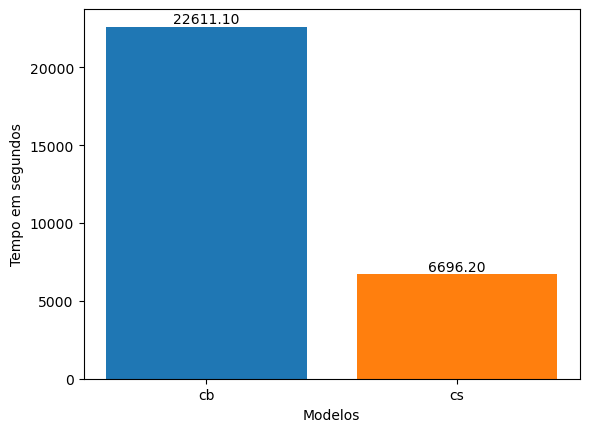

In [11]:
plt_time_by_models(df, f='tempo_por_modelo.pdf')

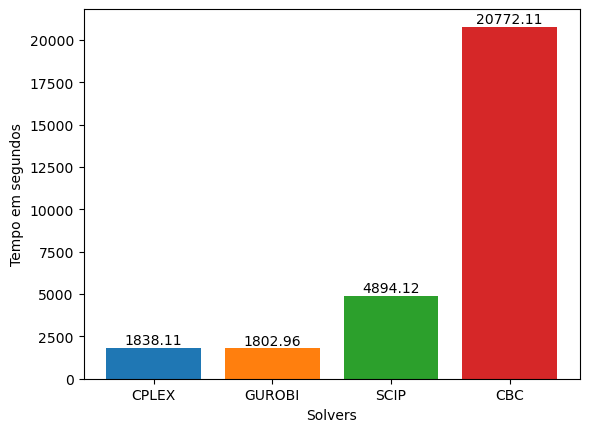

In [12]:
plt_time_by_solver(df, f='tempo_por_solver.pdf')

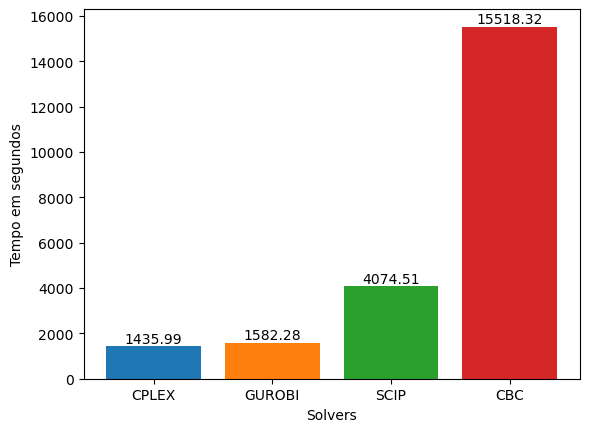

In [13]:
plt_time_by_solver(df.query('model=="cb"'), f='tempo_por_solver_cb.pdf')

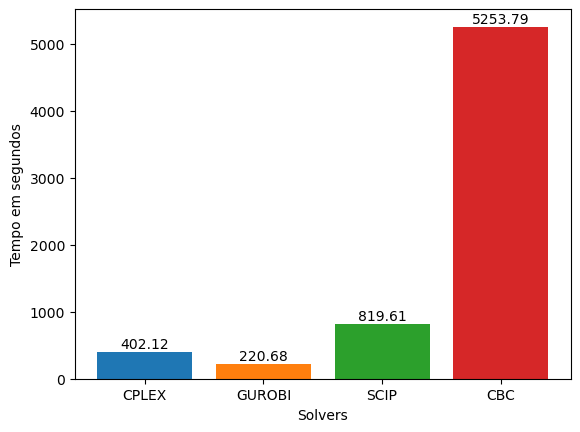

In [14]:
plt_time_by_solver(df.query('model=="cs"'), f='tempo_por_solver_cs.pdf')

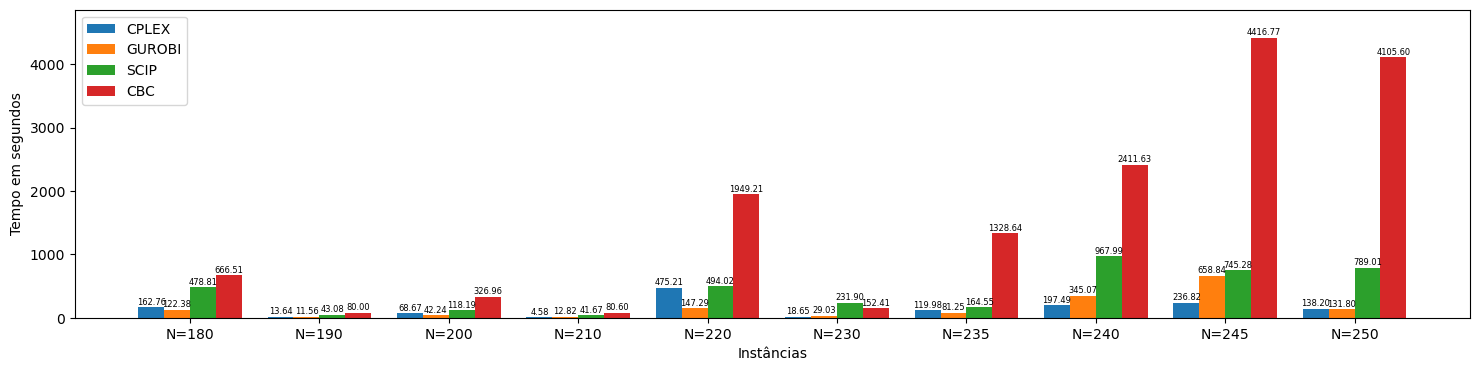

In [15]:
plt_time_by_instance(df.query('model=="cb"'), fs=(18,4), fontsize = 6, f='tempo_por_instancia_cb.pdf')

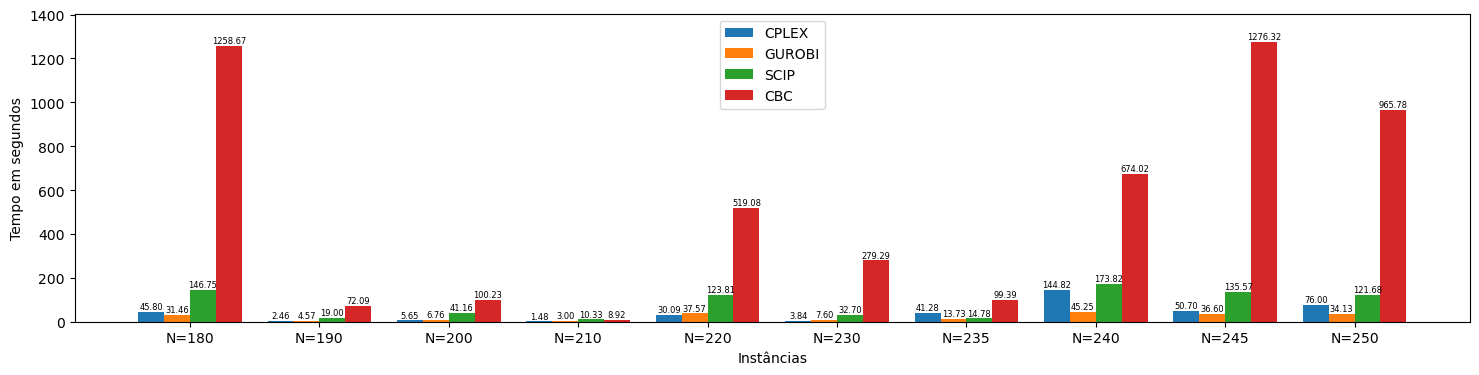

In [17]:
plt_time_by_instance(df.query('model=="cs"'), fs=(18,4), fontsize = 6, f='tempo_por_instancia_cs.pdf', loc='upper center')

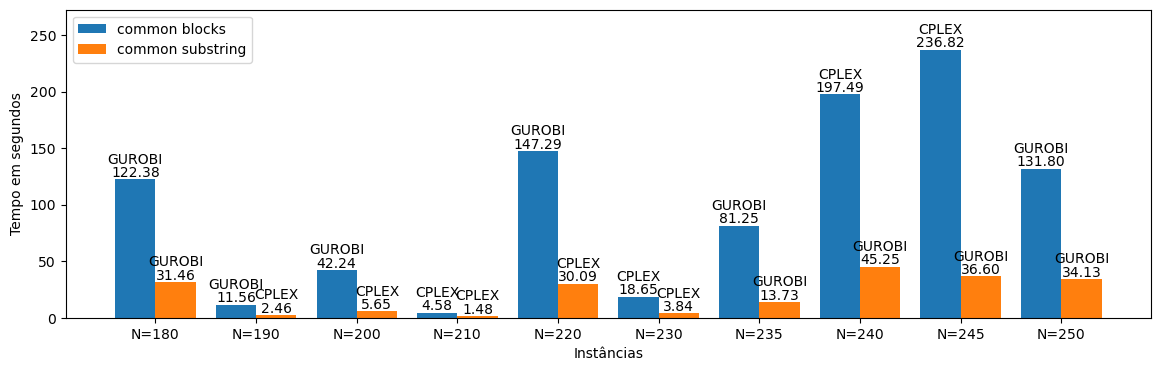

In [18]:
plt_model_solver(df, fs=(14,4), f='tempo_por_instancia_por_modelo_e_solver.pdf')